In [1]:
library(crigen)

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: future


Attaching package: ‘future’


The following objects are masked from ‘package:igraph’:

    %->%, %<-%


Loading required package: listenv

Loading required package: pbapply

Loading required package: parallel

Loading required package: dynutils

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks ig

In [2]:
pbo <- pboptions(type = 'timer')
options(batchtools.progress=TRUE)

In [3]:
model <- create_network(num_tfs=10, num_egenes=100, num_hks=100) %>%
            initialize_kinetics() %>% 
            create_grnas(on_target=0, off_target=1, ngrna_per_target=1, crispr_type='Knockout')

Creating GRN...

GRN Created...

Creating HK Network...

HK Network Created...

Initializing Networks Kinetics...



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01s  


Selecting Target Genes...

Creating gRNA Characteristics...



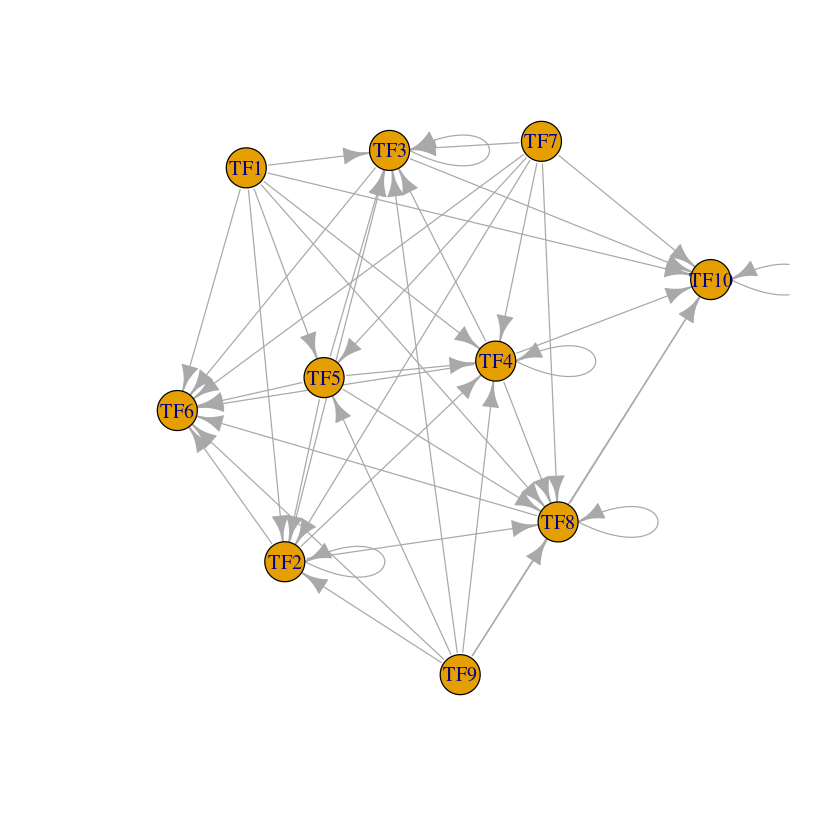

In [4]:
model$feature_network %>%
    filter(grepl('TF', from) & grepl('TF', to)) %>%
    igraph::graph_from_data_frame() %>% plot()

In [6]:
model <- model %>%
            run_simulation(cluster='slurm', nsims_per_grna=1) %>%
            create_experiment()

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01m 40s


In [7]:
model$simulation$sampling$meta

time,phase,sim_name,target_gene,grna,crispr_type,step_ix
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
0,sampling,CTRL-sim.1,CTRL,CTRL,Knockout,1
3,sampling,CTRL-sim.1,CTRL,CTRL,Knockout,2
5,sampling,CTRL-sim.1,CTRL,CTRL,Knockout,3
7,sampling,CTRL-sim.1,CTRL,CTRL,Knockout,4
9,sampling,CTRL-sim.1,CTRL,CTRL,Knockout,5
11,sampling,CTRL-sim.1,CTRL,CTRL,Knockout,6
13,sampling,CTRL-sim.1,CTRL,CTRL,Knockout,7
15,sampling,CTRL-sim.1,CTRL,CTRL,Knockout,8
17,sampling,CTRL-sim.1,CTRL,CTRL,Knockout,9


In [8]:
model$experiment$cell_info

cell_id,step_ix,target_gene,target_perturbed,grna,sim_name,phase,time
<chr>,<int>,<chr>,<lgl>,<chr>,<chr>,<chr>,<dbl>
cell1,116,CTRL,FALSE,CTRL,CTRL-sim.1,sampling,231
cell2,199,CTRL,FALSE,CTRL,CTRL-sim.1,sampling,397
cell3,44,CTRL,FALSE,CTRL,CTRL-sim.1,sampling,87
cell4,18,CTRL,FALSE,CTRL,CTRL-sim.1,sampling,35
cell5,31,CTRL,FALSE,CTRL,CTRL-sim.1,sampling,61
cell6,48,CTRL,FALSE,CTRL,CTRL-sim.1,sampling,95
cell7,124,CTRL,FALSE,CTRL,CTRL-sim.1,sampling,247
cell8,112,CTRL,FALSE,CTRL,CTRL-sim.1,sampling,223
cell9,51,CTRL,FALSE,CTRL,CTRL-sim.1,sampling,101
